In [ ]:
!pip install numba==0.53
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
dataset = get_data('winequality-red')
dataset.shape

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

(1599, 12)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [ ]:
#setting up the environment 
from pycaret.classification import *
exp_mclf101 = setup(data = data, target ='quality', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target           quality
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data        (1439, 12)
5                           Missing Values             False
6                         Numeric Features                11
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (1007, 11)
12                    Transformed Test Set         (432, 11)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ca8e
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
#comparing the models
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.6852  0.6716  0.3763  0.6557   
et                 Extra Trees Classifier    0.6545  0.6757  0.3552  0.6269   
lightgbm  Light Gradient Boosting Machine    0.6445  0.6566  0.3572  0.6221   
gbc          Gradient Boosting Classifier    0.6425  0.6404  0.3661  0.6236   
lr                    Logistic Regression    0.5958  0.6029  0.2751  0.5572   
lda          Linear Discriminant Analysis    0.5948  0.6090  0.3285  0.5740   
ridge                    Ridge Classifier    0.5859  0.0000  0.2480  0.5008   
dt               Decision Tree Classifier    0.5749  0.5469  0.3395  0.5758   
qda       Quadratic Discriminant Analysis    0.5393  0.5728  0.3516  0.5460   
ada                  Ada Boost Classifier    0.5322  0.4855  0.2675  0.4505   
nb                            Naive Bayes    0.4836  0.5730  0.3512  0.5492   
knn                K Neighbors Classifier    0.4598  0.5088  0.2170  0.4313   
dummy                    Dummy Classifier    0.4230  0.4000  0.1733  0.1790   
svm                   SVM - Linear Kernel    0.3883  0.0000  0.2037  0.3157   

              F1   Kappa     MCC  TT (Sec)  
rf        0.6654  0.4908  0.4950     0.567  
et        0.6347  0.4394  0.4438     0.512  
lightgbm  0.6296  0.4304  0.4332     0.471  
gbc       0.6285  0.4295  0.4328     1.582  
lr        0.5663  0.3314  0.3369     1.034  
lda       0.5810  0.3536  0.3556     0.019  
ridge     0.5307  0.2974  0.3083     0.018  
dt        0.5726  0.3412  0.3429     0.022  
qda       0.5373  0.2958  0.2986     0.022  
ada       0.4759  0.2189  0.2323     0.223  
nb        0.5027  0.2636  0.2709     0.019  
knn       0.4401  0.1226  0.1240     0.119  
dummy     0.2515  0.0000  0.0000     0.015  
svm       0.2753  0.0595  0.0823     0.069

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#Creating Random Forest Model
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6931  0.8497  0.3328  0.6580  0.6738  0.5102  0.5125
1       0.6931  0.8575  0.3427  0.6601  0.6751  0.5074  0.5097
2       0.6733  0.8040  0.4876  0.6498  0.6547  0.4678  0.4724
3       0.6634  0.7969  0.3577  0.6306  0.6465  0.4633  0.4646
4       0.6733  0.8243  0.3403  0.6441  0.6490  0.4694  0.4804
5       0.6634  0.8365  0.3076  0.6332  0.6336  0.4414  0.4488
6       0.7624  0.8943  0.3782  0.7219  0.7409  0.6195  0.6218
7       0.6000  0.0000  0.3362  0.5633  0.5795  0.3458  0.3478
8       0.7400  0.0000  0.5298  0.7412  0.7306  0.5813  0.5872
9       0.6900  0.8526  0.3500  0.6550  0.6705  0.5021  0.5050
Mean    0.6852  0.6716  0.3763  0.6557  0.6654  0.4908  0.4950
Std     0.0420  0.3368  0.0690  0.0464  0.0439  0.0712  0.0712

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#tune a model
import numpy as np
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5545  0.7145  0.3366  0.5564  0.5506  0.3210  0.3236
1       0.5842  0.7148  0.2634  0.5613  0.5585  0.3115  0.3177
2       0.5149  0.6761  0.2506  0.4864  0.4910  0.2103  0.2160
3       0.5248  0.7003  0.2999  0.5076  0.5057  0.2611  0.2671
4       0.5149  0.7014  0.2571  0.4854  0.4989  0.2216  0.2226
5       0.5842  0.6952  0.2745  0.5375  0.5562  0.3244  0.3290
6       0.6139  0.7627  0.4508  0.5825  0.5951  0.3837  0.3856
7       0.5500  0.0000  0.3352  0.5231  0.5246  0.2741  0.2835
8       0.5900  0.0000  0.3707  0.5636  0.5738  0.3538  0.3564
9       0.5600  0.7129  0.3238  0.5852  0.5536  0.3023  0.3153
Mean    0.5591  0.5678  0.3163  0.5389  0.5408  0.2964  0.3017
Std     0.0323  0.2847  0.0587  0.0351  0.0325  0.0523  0.0518

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


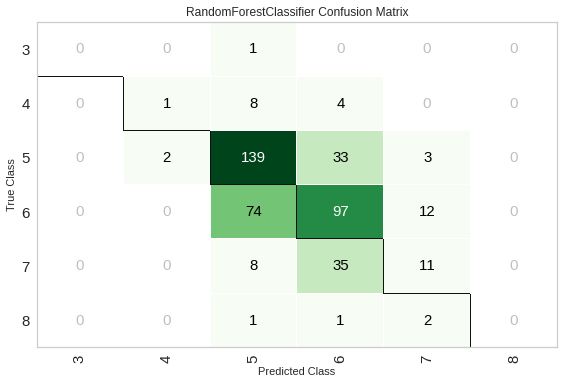

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_rf, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  Random Forest Classifier    0.5741  0.7016   0.266  0.5474  0.5493  0.297   

      MCC  
0  0.3029

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              8.1              0.66         0.70             2.2      0.098   
1              8.3              0.28         0.48             2.1      0.093   
2             12.5              0.60         0.49             4.3      0.100   
3              7.9              0.34         0.42             2.0      0.086   
4              5.9              0.61         0.08             2.1      0.071   
..             ...               ...          ...             ...        ...   
427            8.3              0.28         0.48             2.1      0.093   
428            9.0              0.80         0.12             2.4      0.083   
429            9.5              0.59         0.44             2.3      0.071   
430            6.7              0.54         0.13             2.0      0.076   
431            9.2              0.63         0.21             2.7      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   25.0                 129.0  0.99720  3.08       0.53   
1                    6.0                  12.0  0.99408  3.26       0.62   
2                    5.0                  14.0  1.00100  3.25       0.74   
3                    8.0                  19.0  0.99546  3.35       0.60   
4                   16.0                  24.0  0.99376  3.56       0.77   
..                   ...                   ...      ...   ...        ...   
427                  6.0                  12.0  0.99408  3.26       0.62   
428                  8.0                  28.0  0.99836  3.33       0.65   
429                 21.0                  68.0  0.99920  3.46       0.63   
430                 15.0                  36.0  0.99730  3.61       0.64   
431                 29.0                  65.0  0.99880  3.28       0.58   

     alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0        9.0        5      5   0.0000   0.0000   0.8714   0.1286   0.0000   
1       12.4        7      6   0.0000   0.0000   0.0909   0.9091   0.0000   
2       11.9        6      7   0.0000   0.0000   0.0149   0.2388   0.6716   
3       11.4        6      6   0.0000   0.0000   0.0909   0.9091   0.0000   
4       11.1        6      6   0.0000   0.0000   0.0000   0.9565   0.0435   
..       ...      ...    ...      ...      ...      ...      ...      ...   
427     12.4        7      6   0.0000   0.0000   0.0909   0.9091   0.0000   
428     10.4        6      6   0.0000   0.0526   0.3684   0.5789   0.0000   
429      9.5        5      5   0.0058   0.0000   0.5029   0.4737   0.0175   
430      9.8        5      5   0.0058   0.0000   0.5029   0.4737   0.0175   
431      9.6        5      5   0.0058   0.0000   0.5029   0.4737   0.0175   

     Score_5  
0     0.0000  
1     0.0000  
2     0.0746  
3     0.0000  
4     0.0000  
..       ...  
427   0.0000  
428   0.0000  
429   0.0000  
430   0.0000  
431   0.0000  

[432 rows x 19 columns]

In [ ]:
final_rf = finalize_model(tuned_rf)
#Final K Nearest Neighbour parameters for deployment
print(final_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurit

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen, raw_score=True)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.5688  0.7041  0.2702  0.5577  0.5596  0.2981   

      MCC  
0  0.2998

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0105   0.0366   0.6178   0.3246   0.0105   
1     10.0        7      5   0.0000   0.0811   0.5946   0.3243   0.0000   
2      9.1        5      5   0.0105   0.0366   0.6178   0.3246   0.0105   
3      9.3        5      6   0.0000   0.0123   0.2699   0.5890   0.1166   
4      9.8        5      5   0.0000   0.0256   0.8974   0.0769   0.0000   

   Score_5  
0   0.0000  
1   0.0000  
2   0.0000  
3   0.0123  
4   0.0000

In [ ]:
save_model(final_rf,'Final Random Forest Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), model_name=Final Random Forest Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                       

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

In [ ]:
saved_final_rf = load_model('Final Random Forest Model 08Feb2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Random Forest Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen, raw_score=True)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=5, max_feature

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.5688  0.7041  0.2702  0.5577  0.5596  0.2981   

      MCC  
0  0.2998

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0105   0.0366   0.6178   0.3246   0.0105   
1     10.0        7      5   0.0000   0.0811   0.5946   0.3243   0.0000   
2      9.1        5      5   0.0105   0.0366   0.6178   0.3246   0.0105   
3      9.3        5      6   0.0000   0.0123   0.2699   0.5890   0.1166   
4      9.8        5      5   0.0000   0.0256   0.8974   0.0769   0.0000   

   Score_5  
0   0.0000  
1   0.0000  
2   0.0000  
3   0.0123  
4   0.0000

In [ ]:
#Creating Extra Tree Model
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6634  0.8587  0.3212  0.6282  0.6451  0.4610  0.4623
1       0.6535  0.8501  0.2997  0.6148  0.6307  0.4361  0.4396
2       0.6337  0.8293  0.4709  0.6128  0.6139  0.4022  0.4092
3       0.6634  0.8126  0.3579  0.6373  0.6484  0.4619  0.4647
4       0.6238  0.8447  0.3015  0.5995  0.6007  0.3786  0.3839
5       0.6436  0.8408  0.2993  0.6200  0.6167  0.4115  0.4184
6       0.6634  0.8694  0.3278  0.6346  0.6441  0.4638  0.4690
7       0.6100  0.0000  0.3411  0.5744  0.5901  0.3623  0.3645
8       0.7100  0.0000  0.5047  0.7073  0.7005  0.5353  0.5414
9       0.6800  0.8514  0.3281  0.6404  0.6565  0.4814  0.4854
Mean    0.6545  0.6757  0.3552  0.6269  0.6347  0.4394  0.4438
Std     0.0273  0.3382  0.0690  0.0327  0.0302  0.0493  0.0494

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 15
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et = tune_model(et) 
print(tuned_et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6634  0.8115  0.3033  0.6235  0.6348  0.4453  0.4520
1       0.6238  0.8022  0.2696  0.6335  0.5838  0.3659  0.3769
2       0.5248  0.7122  0.2372  0.4879  0.4949  0.2123  0.2172
3       0.5842  0.7725  0.2757  0.5666  0.5613  0.3107  0.3157
4       0.5545  0.7647  0.2618  0.5205  0.5180  0.2598  0.2732
5       0.6238  0.7861  0.2718  0.6238  0.5838  0.3665  0.3766
6       0.6634  0.8369  0.2786  0.5872  0.6160  0.4393  0.4483
7       0.6000  0.0000  0.3124  0.5753  0.5663  0.3263  0.3332
8       0.6600  0.0000  0.3637  0.6616  0.6333  0.4347  0.4439
9       0.5600  0.7883  0.2535  0.5371  0.5352  0.2716  0.2763
Mean    0.6058  0.6274  0.2828  0.5817  0.5728  0.3432  0.3513
Std     0.0469  0.3152  0.0340  0.0524  0.0450  0.0772  0.0779

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 16
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


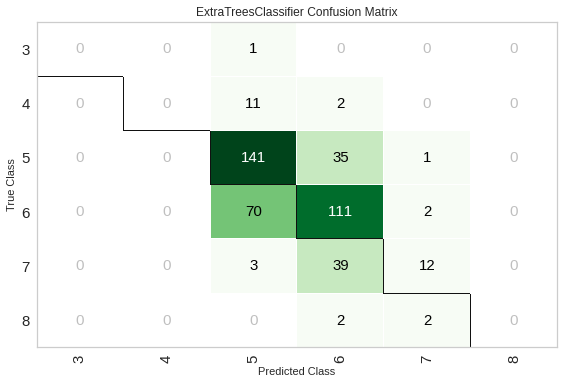

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_et, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.6111  0.7732  0.2709  0.5926  0.5818  0.3469   

      MCC  
0  0.3546

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              8.1              0.66         0.70             2.2      0.098   
1              8.3              0.28         0.48             2.1      0.093   
2             12.5              0.60         0.49             4.3      0.100   
3              7.9              0.34         0.42             2.0      0.086   
4              5.9              0.61         0.08             2.1      0.071   
..             ...               ...          ...             ...        ...   
427            8.3              0.28         0.48             2.1      0.093   
428            9.0              0.80         0.12             2.4      0.083   
429            9.5              0.59         0.44             2.3      0.071   
430            6.7              0.54         0.13             2.0      0.076   
431            9.2              0.63         0.21             2.7      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   25.0                 129.0  0.99720  3.08       0.53   
1                    6.0                  12.0  0.99408  3.26       0.62   
2                    5.0                  14.0  1.00100  3.25       0.74   
3                    8.0                  19.0  0.99546  3.35       0.60   
4                   16.0                  24.0  0.99376  3.56       0.77   
..                   ...                   ...      ...   ...        ...   
427                  6.0                  12.0  0.99408  3.26       0.62   
428                  8.0                  28.0  0.99836  3.33       0.65   
429                 21.0                  68.0  0.99920  3.46       0.63   
430                 15.0                  36.0  0.99730  3.61       0.64   
431                 29.0                  65.0  0.99880  3.28       0.58   

     alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0        9.0        5      5   0.0090   0.0167   0.8305   0.1398   0.0038   
1       12.4        7      6   0.0000   0.0059   0.0448   0.4778   0.4203   
2       11.9        6      6   0.0017   0.0186   0.1904   0.3980   0.3700   
3       11.4        6      6   0.0013   0.0237   0.1567   0.5075   0.2793   
4       11.1        6      6   0.0037   0.0330   0.2339   0.5302   0.1790   
..       ...      ...    ...      ...      ...      ...      ...      ...   
427     12.4        7      6   0.0000   0.0059   0.0448   0.4778   0.4203   
428     10.4        6      5   0.0181   0.0606   0.4655   0.3923   0.0611   
429      9.5        5      5   0.0082   0.0210   0.5899   0.3516   0.0277   
430      9.8        5      5   0.0053   0.0274   0.5391   0.3876   0.0389   
431      9.6        5      5   0.0065   0.0299   0.6064   0.3362   0.0203   

     Score_5  
0     0.0002  
1     0.0511  
2     0.0214  
3     0.0316  
4     0.0202  
..       ...  
427   0.0511  
428   0.0024  
429   0.0016  
430   0.0017  
431   0.0006  

[432 rows x 19 columns]

In [ ]:
final_et = finalize_model(tuned_et)
print(final_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_i

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [ ]:
unseen_predictions = predict_model(final_et, data=data_unseen, raw_score=True)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.6062  0.789  0.2663  0.6073  0.5792  0.3394   

      MCC  
0  0.3492

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0088   0.0423   0.6286   0.3024   0.0175   
1     10.0        7      5   0.0158   0.0553   0.5929   0.3046   0.0297   
2      9.1        5      5   0.0074   0.0374   0.5463   0.3772   0.0297   
3      9.3        5      5   0.0050   0.0333   0.5868   0.3461   0.0279   
4      9.8        5      5   0.0027   0.0227   0.7336   0.2278   0.0127   

   Score_5  
0   0.0003  
1   0.0017  
2   0.0020  
3   0.0010  
4   0.0005

In [ ]:
save_model(final_et,'Final Extra Trees Model 08Feb2020')
saved_final_et = load_model('Final Extra Trees Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), model_name=Final Extra Trees Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      num

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Extra Trees Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_et, data=data_unseen, raw_score=True)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight={}, criterion='entropy',
                                      max_depth=5, max_features=1.0,

Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.6062  0.789  0.2663  0.6073  0.5792  0.3394   

      MCC  
0  0.3492

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0088   0.0423   0.6286   0.3024   0.0175   
1     10.0        7      5   0.0158   0.0553   0.5929   0.3046   0.0297   
2      9.1        5      5   0.0074   0.0374   0.5463   0.3772   0.0297   
3      9.3        5      5   0.0050   0.0333   0.5868   0.3461   0.0279   
4      9.8        5      5   0.0027   0.0227   0.7336   0.2278   0.0127   

   Score_5  
0   0.0003  
1   0.0017  
2   0.0020  
3   0.0010  
4   0.0005

In [ ]:
new_prediction = predict_model(saved_final_et, data=data_unseen, raw_score=True)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight={}, criterion='entropy',
                                      max_depth=5, max_features=1.0,

Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.6062  0.789  0.2663  0.6073  0.5792  0.3394   

      MCC  
0  0.3492

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0088   0.0423   0.6286   0.3024   0.0175   
1     10.0        7      5   0.0158   0.0553   0.5929   0.3046   0.0297   
2      9.1        5      5   0.0074   0.0374   0.5463   0.3772   0.0297   
3      9.3        5      5   0.0050   0.0333   0.5868   0.3461   0.0279   
4      9.8        5      5   0.0027   0.0227   0.7336   0.2278   0.0127   

   Score_5  
0   0.0003  
1   0.0017  
2   0.0020  
3   0.0010  
4   0.0005

In [ ]:
#Light Gradient Boosting Machine model
lightgbm = create_model('lightgbm')
print(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6832  0.8247  0.3391  0.6574  0.6679  0.4925  0.4952
1       0.6139  0.8178  0.3018  0.6016  0.6049  0.3857  0.3883
2       0.6535  0.8138  0.4795  0.6441  0.6421  0.4422  0.4458
3       0.6238  0.7831  0.3416  0.6010  0.6112  0.4123  0.4130
4       0.6040  0.7973  0.3026  0.5783  0.5852  0.3617  0.3669
5       0.6733  0.8350  0.3315  0.6362  0.6528  0.4735  0.4759
6       0.6931  0.8746  0.3498  0.6667  0.6769  0.5195  0.5223
7       0.5600  0.0000  0.3052  0.5301  0.5409  0.2781  0.2802
8       0.6900  0.0000  0.5051  0.6832  0.6822  0.5049  0.5072
9       0.6500  0.8193  0.3160  0.6220  0.6317  0.4338  0.4369
Mean    0.6445  0.6566  0.3572  0.6221  0.6296  0.4304  0.4332
Std     0.0412  0.3291  0.0697  0.0435  0.0424  0.0704  0.0703

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 21
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_lightgbm = tune_model(lightgbm)
print(tuned_lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7030  0.8062  0.3289  0.6637  0.6777  0.5139  0.5184
1       0.6238  0.8161  0.2616  0.5823  0.5784  0.3678  0.3786
2       0.6337  0.7829  0.2908  0.6135  0.6047  0.3905  0.3993
3       0.5842  0.7683  0.2757  0.5680  0.5620  0.3110  0.3161
4       0.5941  0.8018  0.2687  0.5948  0.5583  0.3169  0.3313
5       0.6337  0.7987  0.2556  0.5177  0.5691  0.3764  0.3915
6       0.7228  0.8686  0.3225  0.6704  0.6838  0.5404  0.5502
7       0.5900  0.0000  0.3079  0.5571  0.5603  0.3133  0.3196
8       0.6600  0.0000  0.3743  0.6458  0.6388  0.4402  0.4477
9       0.6400  0.8342  0.2947  0.6212  0.6132  0.4035  0.4105
Mean    0.6385  0.6477  0.2981  0.6034  0.6046  0.3974  0.4063
Std     0.0439  0.3249  0.0347  0.0465  0.0455  0.0763  0.0757

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 23
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


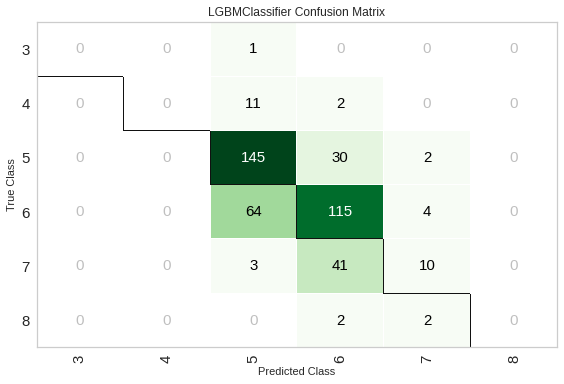

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_lightgbm)
predict_model(tuned_lightgbm, raw_score=True);

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine     0.625  0.7998  0.2721  0.5911  0.5922   

    Kappa     MCC  
0  0.3708  0.3786

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
       

LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen, raw_score=True)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.6938  0.8762  0.3001  0.6897  0.6566   

    Kappa     MCC  
0  0.4901  0.5107

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0032   0.0207   0.7116   0.2021   0.0571   
1     10.0        7      5   0.0060   0.0538   0.5094   0.3242   0.0998   
2      9.1        5      5   0.0030   0.0548   0.4709   0.4054   0.0587   
3      9.3        5      5   0.0028   0.0352   0.6376   0.2546   0.0637   
4      9.8        5      5   0.0027   0.0147   0.7625   0.1641   0.0503   

   Score_5  
0   0.0053  
1   0.0069  
2   0.0072  
3   0.0061  
4   0.0056

In [ ]:
save_model(final_lightgbm,'Final Light Gradient Boosting Machine Model 08Feb2020')
saved_final_lightgbm = load_model('Final Light Gradient Boosting Machine Model 08Feb2020')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=Final Light Gradient Boosting Machine Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classificatio

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Light Gradient Boosting Machine Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen, raw_score=True)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.01,
                                max_depth=-1, min_child_sampl

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.6938  0.8762  0.3001  0.6897  0.6566   

    Kappa     MCC  
0  0.4901  0.5107

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.660         0.00             1.8      0.075   
1            7.3             0.650         0.00             1.2      0.065   
2            7.8             0.610         0.29             1.6      0.114   
3            8.1             0.560         0.28             1.7      0.368   
4            8.3             0.655         0.12             2.3      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 13.0                  40.0   0.9978  3.51       0.56   
1                 15.0                  21.0   0.9946  3.39       0.47   
2                  9.0                  29.0   0.9974  3.26       1.56   
3                 16.0                  56.0   0.9968  3.11       1.28   
4                 15.0                 113.0   0.9966  3.17       0.66   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.4        5      5   0.0032   0.0207   0.7116   0.2021   0.0571   
1     10.0        7      5   0.0060   0.0538   0.5094   0.3242   0.0998   
2      9.1        5      5   0.0030   0.0548   0.4709   0.4054   0.0587   
3      9.3        5      5   0.0028   0.0352   0.6376   0.2546   0.0637   
4      9.8        5      5   0.0027   0.0147   0.7625   0.1641   0.0503   

   Score_5  
0   0.0053  
1   0.0069  
2   0.0072  
3   0.0061  
4   0.0056

Results:
After using the compare_models function on the dataset, I have decided to choose the models based on the performance metric of best accuracy. The reason why I chose the models based on the best accuray is because accuracy is a good way to tell which models perform better tha others. 

The 3 models I chose are Random Forest, Extra Tree and Light Gradient Boosting Machine since those have the best accuracy. After implementing and finding the final or new prediction of the red wine dataset, it looks like Light Gradient Boosting Machine has the highest performance based on it's accuracy with a score of 0.69. Extra Tree had a performance of 0.60 and Random Forest had a performance of 0.56. 